In [2]:
# import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import featuretools as ft
import lightgbm as lgb
from lightgbm import plot_tree
from graphviz import Digraph
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold,GroupKFold, StratifiedKFold
from sklearn.metrics import roc_auc_score,mean_squared_error
import category_encoders as ce
import time
import pickle
import gc

%matplotlib inline

In [3]:
pred = pd.read_csv('./data/baseline_log_hour.csv')

In [5]:
with open('./data/df_test_total.pickle', 'rb') as handle:
    df_test_total = pickle.load(handle)

In [21]:
del df_test_total
gc.collect()

7214

In [8]:
df_pred = pd.merge(df_test_total,pred,on='row_id',how='left')

In [15]:
df_lots_building = df_pred[df_pred['building_id'].isin([1258,1298,1249])]
df_lots_building.head()

,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter_reading
32153792,32153792,1249,0,2017-01-01 01:00:00,14,Office,159384,NaN,NaN,5.6,NaN,-5.6,0.0,1013.1,230.0,4.1,342.921642
32153793,32153793,1249,1,2017-01-01 01:00:00,14,Office,159384,NaN,NaN,5.6,NaN,-5.6,0.0,1013.1,230.0,4.1,672.262546
32153794,32153794,1249,2,2017-01-01 01:00:00,14,Office,159384,NaN,NaN,5.6,NaN,-5.6,0.0,1013.1,230.0,4.1,1126.847027
32153795,32153795,1249,3,2017-01-01 01:00:00,14,Office,159384,NaN,NaN,5.6,NaN,-5.6,0.0,1013.1,230.0,4.1,465.036523
32153817,32153817,1258,0,2017-01-01 01:00:00,14,Education,273234,NaN,NaN,5.6,NaN,-5.6,0.0,1013.1,230.0,4.1,905.055357


In [20]:
df_pred[df_pred.meter_reading < 0]['building_id'].unique()

array([ 252,  282,  258,  162,  290,  267,  263,  163,  260,  200,  236,
        171,  250,  304,  345,  637,  636,  740,  751,  755,  770,  771,
        778,  745,  762,  765,  758,  753,  800,  857,  815,  817,  961,
       1013, 1018, 1022, 1001, 1000, 1003, 1032, 1077, 1079, 1093, 1094,
       1098, 1101, 1122, 1142, 1146, 1160, 1161, 1167, 1196, 1201, 1211,
       1216, 1217, 1219, 1177, 1095, 1074, 1080, 1119, 1111, 1207, 1324,
       1237, 1273, 1270, 1274, 1268, 1272, 1228, 1254, 1321, 1232, 1245,
       1233, 1259, 1307, 1265, 1264, 1230, 1336, 1342, 1391, 1398, 1412,
       1345, 1397, 1396, 1395, 1346, 1446])

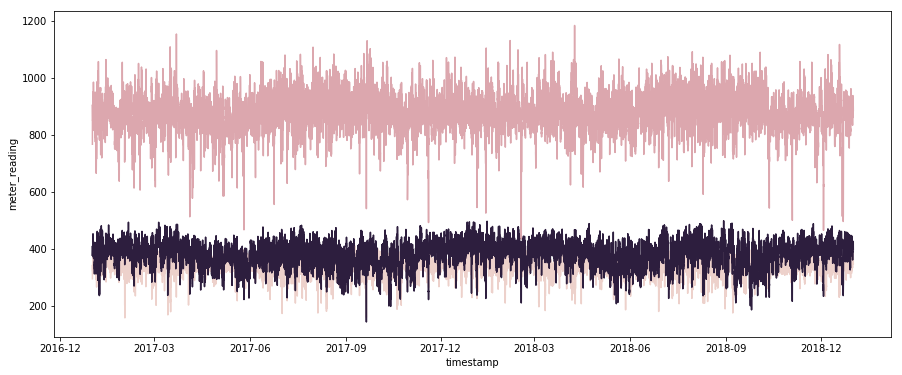

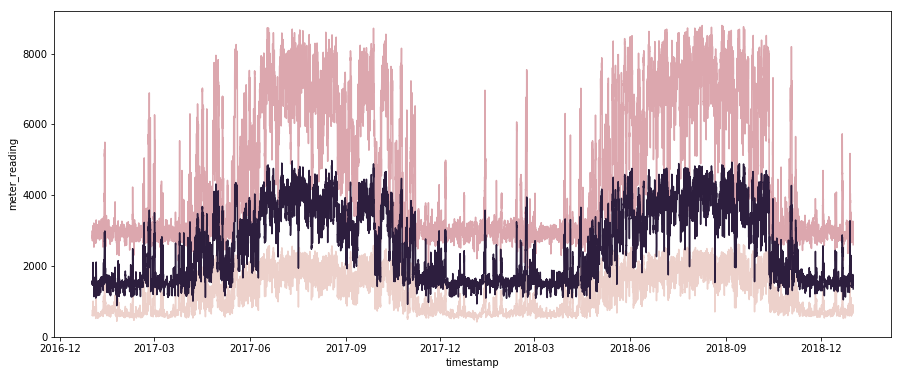

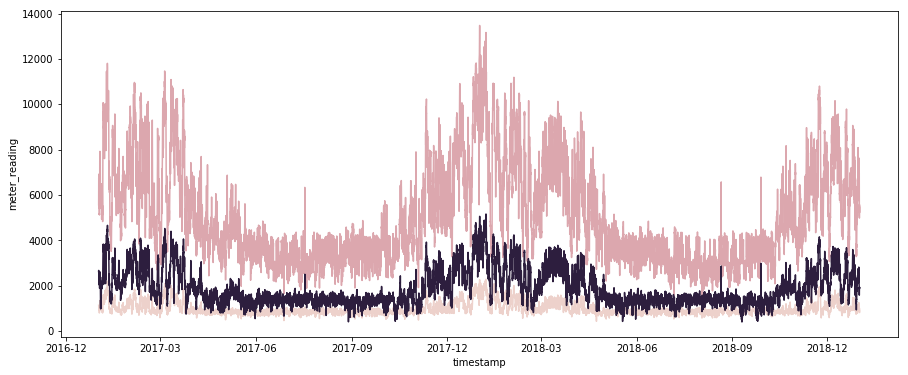

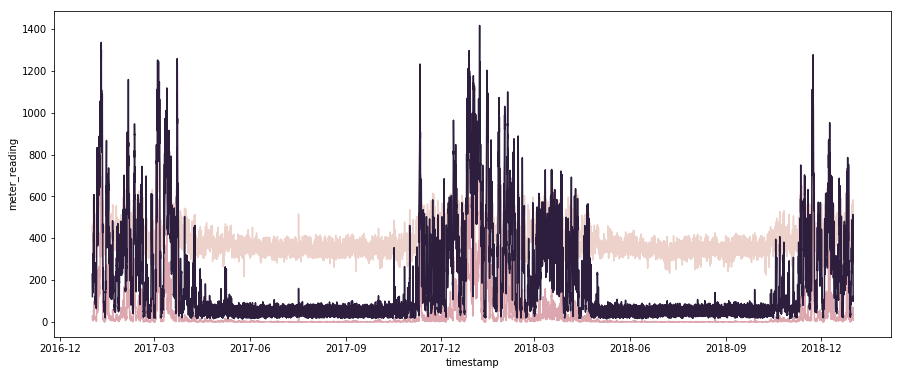

In [18]:
for i in range(0,4):
    f, ax = plt.subplots(figsize=(15, 6))
    sns.lineplot(x='timestamp',y='meter_reading', hue = 'building_id',legend=False,
             data=df_lots_building[df_lots_building.meter == i])